# Datenbasis verstehen & Erste EDA

Dieses Notebook lädt die SQLite-Datenbank und führt erste explorative Analysen durch.

**Ziel**: Verstehen der Datenstruktur, Zeitraum, Zeitungen und erste Klima-Suffix-Übersicht

## 1. Setup & Daten laden

In [1]:
# Zelle 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# pylib-Funktionen nutzen
sys.path.append("../pylib")
from handle_sqlite import read_table_as_dataframe

In [2]:
# Zelle 2: Datenbank-Pfad & Laden
db_path = "../data_output/dwh_data.db"
meta_df = read_table_as_dataframe("newspapers", db_path)
context_df = read_table_as_dataframe("context", db_path)

2026-02-12 00:34:47,508 - INFO - Data read from table 'newspapers' in '../data_output/dwh_data.db' successfully.
2026-02-12 00:34:48,410 - INFO - Data read from table 'context' in '../data_output/dwh_data.db' successfully.


In [3]:
# Zelle 3: Erste Übersicht - Meta-Daten
print(f"Meta: {len(meta_df)} Einträge")
print(f"Context: {len(context_df)} Einträge")
print("\nMeta-Datenstruktur:")
meta_df.head()

Meta: 77673 Einträge
Context: 191638 Einträge

Meta-Datenstruktur:


,newspaper_name,data_published,klima_mentions_count,newspaper_id
0,sz,2021-04-01,6,1
1,zeit,2021-04-01,4,2
2,faz,2021-04-01,11,3
3,heise,2021-04-01,4,4
4,golem,2021-04-01,0,5


In [4]:
# Zelle 4: Context-Daten Überblick
print("Context-Datenstruktur:")
context_df.head()

Context-Datenstruktur:


,pre_context,post_context,prefix,suffix,newspaper_id
0,im Zuge des,werden dürfte. Kommentar,,wandels,1
1,Digital Alles zur,Das Wichtigste auf,,krise,1
2,einer Seite Der,Streitgespräch Wirtschaftswachstum und,SZ,monitor,1
3,Streitgespräch Wirtschaftswachstum und,04:00 Video Warum,,krise,1
4,Golfstrom für das,so wichtig ist,,,1


## 2. Zeitraum & Zeitungen verstehen

In [5]:
# Zelle 5: Zeitraum analysieren
meta_df['data_published'] = pd.to_datetime(meta_df['data_published'])
print(f"Zeitraum: {meta_df['data_published'].min()} bis {meta_df['data_published'].max()}")
print(f"Anzahl Tage: {meta_df['data_published'].nunique()}")
print(f"Gesamtzeitraum: {(meta_df['data_published'].max() - meta_df['data_published'].min()).days} Tage")

Zeitraum: 2021-04-01 00:00:00 bis 2025-01-31 00:00:00
Anzahl Tage: 1401
Gesamtzeitraum: 1401 Tage


In [6]:
# Zelle 6: Welche Zeitungen?
print(f"Anzahl unterschiedlicher Zeitungen: {meta_df['newspaper_name'].nunique()}")
print("\nVerteilung der Einträge pro Zeitung:")
meta_df['newspaper_name'].value_counts()

Anzahl unterschiedlicher Zeitungen: 64

Verteilung der Einträge pro Zeitung:


newspaper_name
sz                1401
zeit              1401
faz               1401
heise             1401
tagesspiegel      1401
                  ... 
dw                 769
ecoute             385
dfi                384
danielmiessler     372
economist          257
Name: count, Length: 64, dtype: int64

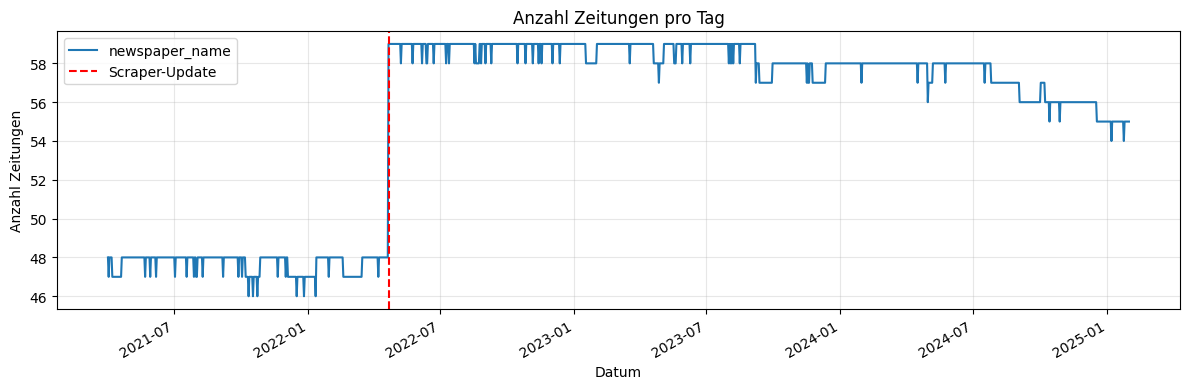

In [ ]:
# Zelle 7: Zeitungen pro Tag (über Zeit)
newspapers_per_day = meta_df.groupby('data_published')['newspaper_name'].nunique()

fig, ax = plt.subplots(figsize=(12, 4))
newspapers_per_day.plot(ax=ax, title="Anzahl Zeitungen pro Tag")
ax.axvline(pd.to_datetime('2022-04-21'), color='red', linestyle='--', label='Scraper-Update')
ax.set_ylim(bottom=0)  # Startet bei Null
ax.set_xlabel("Datum")
ax.set_ylabel("Anzahl Zeitungen")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

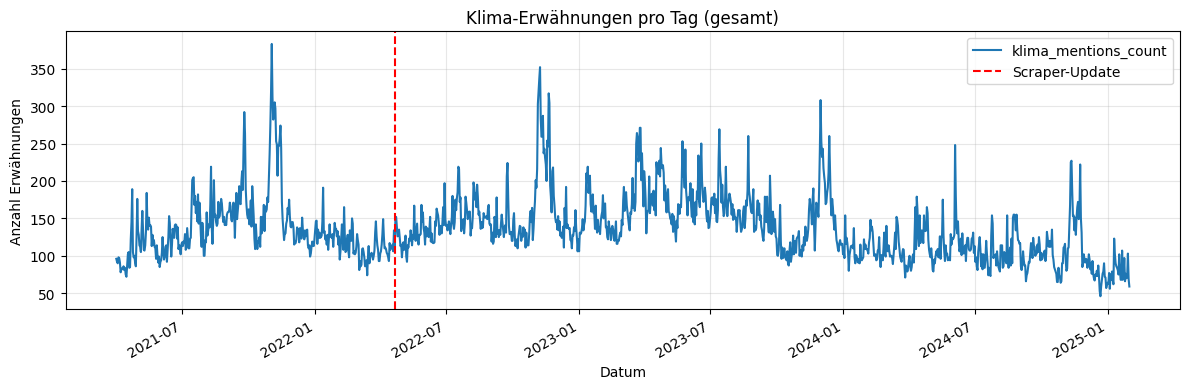

In [8]:
# Zelle 8: Klima-Erwähnungen über Zeit
klima_per_day = meta_df.groupby('data_published')['klima_mentions_count'].sum()

plt.figure(figsize=(12, 4))
klima_per_day.plot()
plt.axvline(pd.to_datetime('2022-04-21'), color='red', linestyle='--', label='Scraper-Update')
plt.title("Klima-Erwähnungen pro Tag (gesamt)")
plt.xlabel("Datum")
plt.ylabel("Anzahl Erwähnungen")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Erste Klima-Suffix-Übersicht

In [9]:
# Zelle 9: Häufigste Suffixe (alle, inkl. englisch)
print("Top 20 Klima-Suffixe (alle Sprachen):")
suffix_counts = context_df['suffix'].value_counts().head(20)
suffix_counts

Top 20 Klima-Suffixe (alle Sprachen):


suffix
                45079
wandel          26565
schutz          20187
krise           15089
aktivisten       4430
konferenz        3598
politik          3333
neutral          3092
ziele            2807
wandels          2607
News             1587
neutralität      1564
freundlich       1402
news             1219
gipfel           1208
Nachrichten      1188
bericht          1145
streik           1065
schutzgesetz      987
forscher          986
Name: count, dtype: int64

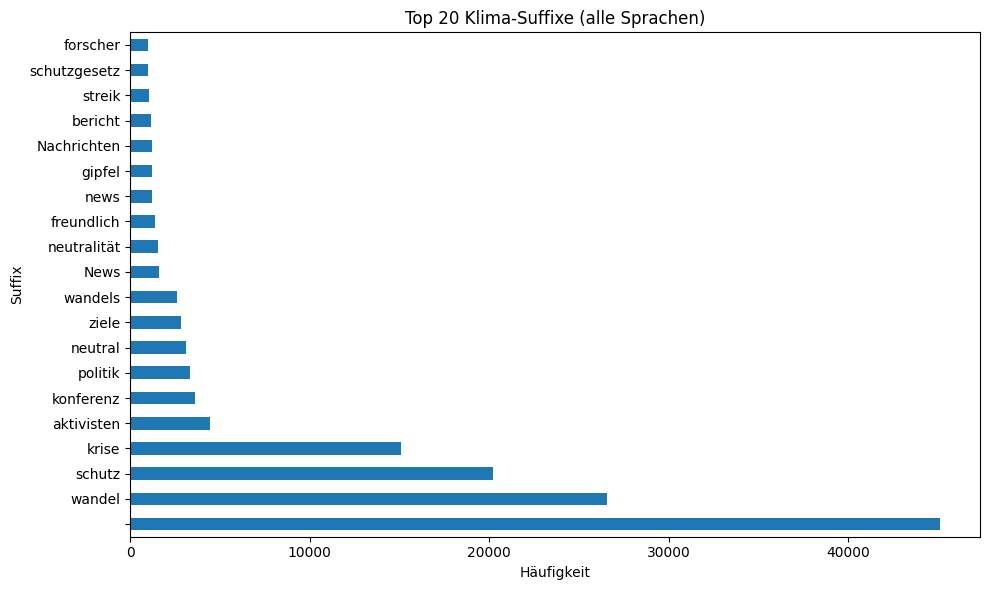

In [10]:
# Zelle 10: Plot der Top 20 Suffixe
plt.figure(figsize=(10, 6))
suffix_counts.plot(kind='barh')
plt.title("Top 20 Klima-Suffixe (alle Sprachen)")
plt.xlabel("Häufigkeit")
plt.ylabel("Suffix")
plt.tight_layout()
plt.show()

In [11]:
# Zelle 11: Anzahl unterschiedlicher Suffixe
print(f"Gesamtanzahl unterschiedlicher Suffixe: {context_df['suffix'].nunique()}")
print(f"Gesamtanzahl Klima-Erwähnungen in Context-Tabelle: {len(context_df)}")

Gesamtanzahl unterschiedlicher Suffixe: 2616
Gesamtanzahl Klima-Erwähnungen in Context-Tabelle: 191638


## 4. Zusammenfassung & Erkenntnisse

### Datenbasis
Die Analyse zeigt:
- **Zeitraum**: [wird nach Ausführung sichtbar]
- **Anzahl Tage**: [wird nach Ausführung sichtbar]
- **Anzahl Zeitungen**: [wird nach Ausführung sichtbar]
- **Klima-Erwähnungen**: [wird nach Ausführung sichtbar]

Ergebinsse:
Zeitraum: 2021-04-01 00:00:00 bis 2025-01-31 00:00:00
Anzahl Tage: 1401
Gesamtzeitraum: 1401 Tage
Meta: 77673 Einträge
Context: 191638 Einträge
Anzahl unterschiedlicher Zeitungen: 64
Klimaerwähnugen haben 5 spitzen/ausschläge, 4 davon nach der umstellung.
Tendenz ist überwiegend gleichbleibend, leicht abfallend. anzahl ändert sich nicht bei scraper umstellung.

### Auffälligkeiten
Die Visualisierungen zeigen:
- **Scraper-Update am 21.04.2022**: Sichtbare Veränderung in der Anzahl der Zeitungen? ja um 11
- **Top-Suffixe**: Welche Begriffe dominieren? Deutsch vs. Englisch? deutsche
- **Zeitliche Muster**: Gibt es Trends oder Sprünge in den Klima-Erwähnungen? siehe ergebnisse oben.

### Nächste Schritte
Basierend auf diesen Erkenntnissen:
1. **Nullen-Analyse**: Welche Zeitungen haben Lücken oder Nullwerte?
2. **Sprachfilter**: Sollten nur deutsche Begriffe behalten werden? nein, aber deutsche zeitungen, aus aber reserche gründen und fokus auf DE.
3. **Zeitfilter**: Ist eine Filterung ab 21.04.2022 sinnvoll? ja.
4. **Prefix-Analyse**: Welche Präfixe kommen vor "Klima" vor? nein, ignorieren
5. **Detailanalyse**: Einzelne Zeitungen oder Zeiträume genauer betrachten, nein, begriffe genauer betrachten (müssen vereinheitlicht werden). 